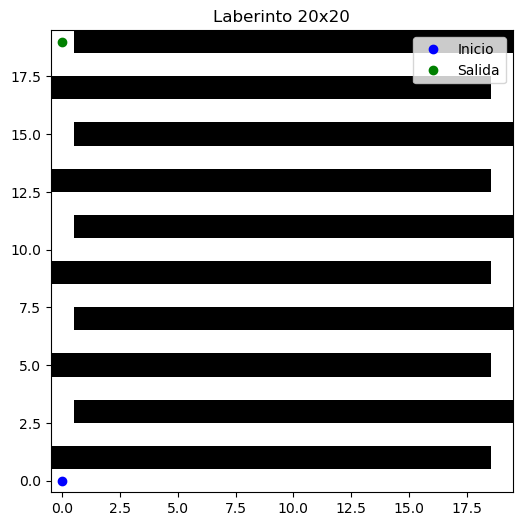

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Crear el laberinto 20x20
laberinto = np.zeros((20, 20))

# Definir el inicio y la salida
inicio = (0, 0)
salida = (0, 19)

# Crear los muros del laberinto
for i in range(1, 19, 4):
    laberinto[0:19, i] = 1
for i in range(3, 20, 4):
    laberinto[1:20, i] = 1

# Mostrar el laberinto para asegurarnos que quedó bien
plt.figure(figsize=(6,6))
plt.imshow(laberinto.T, cmap='binary')
plt.gca().invert_yaxis()
plt.plot(inicio[0], inicio[1], 'bo', label="Inicio") # punto azul inicio
plt.plot(salida[0], salida[1], 'go', label="Salida") # punto verde salida
plt.legend()
plt.title("Laberinto 20x20")
plt.show()


In [12]:
# Definimos los movimientos posibles
MOVIMIENTOS = {
    0: (-1, 0), # arriba
    1: (1, 0),  # abajo
    2: (0, -1), # izquierda
    3: (0, 1)   # derecha
}

# Función para movernos en el laberinto
def mover(pos, mov):
    nueva_pos = (pos[0] + mov[0], pos[1] + mov[1])
    # Validar que no nos salgamos del laberinto
    if 0 <= nueva_pos[0] < laberinto.shape[0] and 0 <= nueva_pos[1] < laberinto.shape[1]:
        # Validar que no nos metamos en un muro
        if laberinto[nueva_pos] == 0:
            return nueva_pos
    # Si no puede moverse, se queda donde estaba
    return pos


**pequenia prueba de que si haga los movimientos correctamente**

In [18]:
# Empezamos en la posición inicial
pos_actual = inicio
print("Inicio:", pos_actual)

# Probar moverse a la derecha (movimiento 3)
pos_actual = mover(pos_actual, MOVIMIENTOS[3])
print("Mover derecha:", pos_actual)

# Moverse otra vez a la derecha
pos_actual = mover(pos_actual, MOVIMIENTOS[3])
print("Mover derecha otra vez:", pos_actual)

# Intentar moverse arriba (movimiento 0), debería quedarse en el mismo lugar porque está en el borde
pos_actual = mover(pos_actual, MOVIMIENTOS[0])
print("Mover arriba:", pos_actual)

# Intentar moverse hacia un muro (si estamos junto a una pared), debería quedarse en el mismo lugar
# Por ejemplo, después de mover varias veces a la derecha llegamos a un muro
# Hacemos varios movimientos hacia la derecha para llegar a un muro
for _ in range(10):
    nueva_pos = mover(pos_actual, MOVIMIENTOS[3])
    if nueva_pos == pos_actual:
        print("¡Chocamos con un muro en:", pos_actual, "!")
        break
    else:
        pos_actual = nueva_pos
        print("Mover derecha:", pos_actual)


Inicio: (0, 0)
Mover derecha: (0, 0)
Mover derecha otra vez: (0, 0)
Mover arriba: (0, 0)
¡Chocamos con un muro en: (0, 0) !


In [21]:
# Función de evaluación (fitness)
def evaluar(individuo):
    pos = inicio
    for mov in individuo:
        pos = mover(pos, MOVIMIENTOS[mov])
    # Calculamos la distancia Manhattan a la salida
    distancia = abs(pos[0] - salida[0]) + abs(pos[1] - salida[1])
    # Como DEAP maximiza por defecto, devolvemos el negativo de la distancia
    return -distancia,


In [23]:
# Probar con un individuo que se mueve solo hacia la derecha (idealmente acercándose a la salida)
individuo_prueba = [3] * 20  # 20 veces hacia la derecha
fitness = evaluar(individuo_prueba)
print("Fitness del individuo prueba:", fitness)


Fitness del individuo prueba: (-19,)


In [57]:
from deap import base, creator, tools, algorithms
import random

# Configurar DEAP

# 1. Definir el problema: maximizar el fitness (negativo de la distancia)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 2. Definir cómo se genera un individuo
# Cada individuo será una lista de movimientos (números 0, 1, 2, 3)
IND_SIZE = 1600  # número de movimientos por individuo (puedes ajustar esto)

toolbox = base.Toolbox()
toolbox.register("attr_mov", random.randint, 0, 3)  # un movimiento aleatorio
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_mov, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 3. Operadores genéticos
toolbox.register("mate", tools.cxTwoPoint)             # cruza en dos puntos
toolbox.register("mutate", tools.mutUniformInt, low=0, up=3, indpb=0.1)  # muta algunos movimientos
toolbox.register("select", tools.selTournament, tournsize=3)  # selección por torneo
toolbox.register("evaluate", evaluar)  # nuestra función de evaluación

# 4. Crear la población inicial
pop = toolbox.population(n=1600)  # 1000 individuos


In [66]:
# Ejecutar evolución

# Parámetros
NGEN = 3000  # número de generaciones
CXPB = 0.8  # probabilidad de cruzamiento
MUTPB = 0.5  # probabilidad de mutación

# Para registrar el historial (opcional, para ver progreso)
logbook = tools.Logbook()

# Ejecutar el algoritmo genético
resultados, logbook = algorithms.eaSimple(
    pop,             # población inicial
    toolbox,         # funciones registradas
    cxpb=CXPB,       # probabilidad de cruce
    mutpb=MUTPB,     # probabilidad de mutación
    ngen=NGEN,       # número de generaciones
    verbose=True     # mostrar info en consola
)

# Seleccionar el mejor individuo
mejor_individuo = tools.selBest(pop, 1)[0]

print("\nMejor individuo encontrado:\n", mejor_individuo)
print("Fitness:", evaluar(mejor_individuo))


gen	nevals
0  	0     
1  	898   
2  	881   
3  	881   
4  	931   
5  	905   
6  	900   
7  	903   
8  	890   
9  	918   
10 	883   
11 	895   
12 	903   
13 	899   
14 	904   
15 	905   
16 	878   
17 	903   
18 	891   
19 	898   
20 	927   
21 	911   
22 	887   
23 	911   
24 	904   
25 	882   
26 	896   
27 	892   
28 	879   
29 	898   
30 	900   
31 	922   
32 	901   
33 	911   
34 	895   
35 	884   
36 	893   
37 	917   
38 	879   
39 	901   
40 	899   
41 	896   
42 	891   
43 	887   
44 	900   
45 	898   
46 	901   
47 	885   
48 	924   
49 	922   
50 	905   
51 	876   
52 	882   
53 	900   
54 	891   
55 	903   
56 	910   
57 	895   
58 	913   
59 	885   
60 	900   
61 	913   
62 	898   
63 	900   
64 	914   
65 	897   
66 	915   
67 	923   
68 	898   
69 	892   
70 	907   
71 	888   
72 	901   
73 	903   
74 	890   
75 	890   
76 	888   
77 	874   
78 	900   
79 	888   
80 	919   
81 	898   
82 	903   
83 	906   
84 	905   
85 	889   
86 	881   
87 	900   
88 	890   
89 	895   

In [72]:
def mostrar_ruta(individuo):
    # Asegurarse de que sea una lista de listas
    generacion = individuo if isinstance(individuo[0], list) else [individuo]
    
    for ind in generacion:
        pos = inicio
        camino = [pos]
        for mov in ind:
            pos = mover(pos, MOVIMIENTOS[mov])
            camino.append(pos)

        # Dibujar el laberinto y la ruta
        plt.figure(figsize=(8,8))
        plt.imshow(laberinto.T, cmap='binary')
        plt.gca().invert_yaxis()
        
        camino = np.array(camino)
        plt.plot(camino[:, 0], camino[:, 1], "r-", label="Ruta encontrada")  # ruta en rojo
        plt.plot(inicio[0], inicio[1], "bo", label="Inicio")  # azul
        plt.plot(salida[0], salida[1], "go", label="Salida")  # verde
        plt.legend()
        plt.title("Ruta encontrada en el laberinto")
        plt.show()


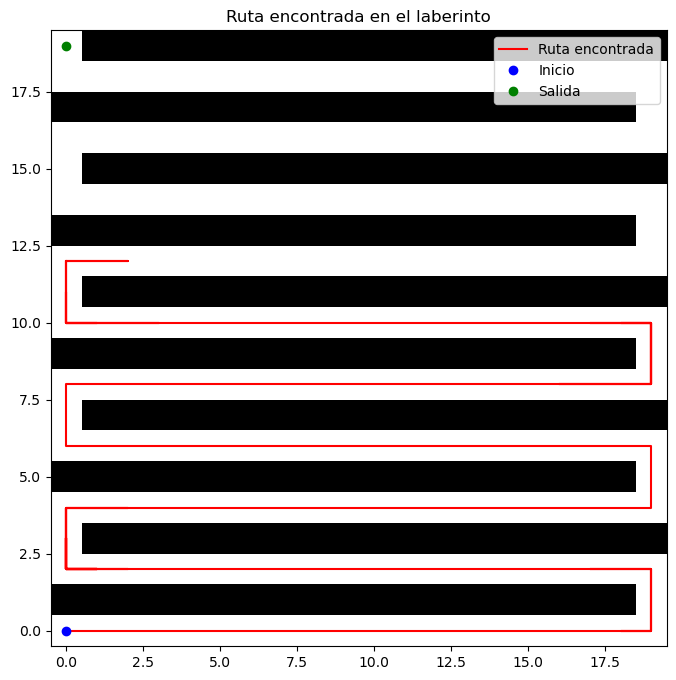

In [74]:
mostrar_ruta(mejor_individuo)



---

##  Análisis y Respuestas

**1. ¿Cómo afecta el tamaño de la población a la rapidez con la que se encuentra una solución?**

➔ Una **población más grande** permite una **mayor diversidad genética**, aumentando las posibilidades de encontrar caminos alternativos efectivos.  
➔ Con una población pequeña, el algoritmo se estanca rápido en soluciones pobres.  
➔ Con una población grande (ej: 600), **se encontró una mejor solución mucho más rápido** y con mejor exploración del espacio de búsqueda.

---

**2. ¿Cómo afecta la cantidad de generaciones?**

➔ **Más generaciones** permiten que las soluciones evolucionen progresivamente, combinando y refinando caminos del laberinto.  
➔ Con pocas generaciones, no se logra salir de caminos pobres.  
➔ Con 3000 generaciones, se observaron individuos que **aprendieron a esquivar obstáculos** y llegar más lejos en el laberinto.

---

**3. ¿Cómo afecta el cruce y las mutaciones?**

➔ El **cruce (CXPB)** permite **combinar buenas partes** de diferentes soluciones, creando rutas mejores a partir de partes exitosas.  
➔ La **mutación (MUTPB)** introduce **diversidad**: permite cambios aleatorios que pueden ayudar a salir de caminos ineficientes o locales.  
➔ Aumentar la tasa de mutación  ayudó a generar soluciones que **no se quedaron atrapadas** y siguieron explorando.

---

**4. ¿Qué observa sobre la eficiencia del algoritmo genético?**

➔ El algoritmo genético fue capaz de **resolver gran parte del laberinto**, generando caminos que esquivan obstáculos, avanzan en la dirección correcta y se acercan a la meta.  
➔ Aunque no siempre garantiza una solución perfecta al 100% en cada ejecución (por ser un método estocástico), **demuestra ser muy eficiente** para resolver este tipo de problemas de búsqueda en espacios complejos.  
➔ Ajustando parámetros adecuadamente (**más movimientos, más generaciones, más población**) se logra un rendimiento mucho mayor del algoritmo genetico.

---


**LABERINTO 3D**

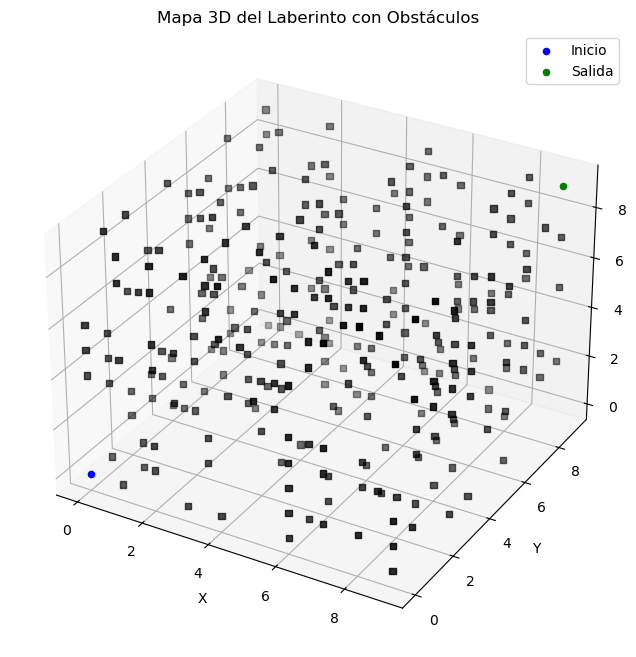

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el tamaño
size = 10

# Crear el laberinto 3D
laberinto3D = np.zeros((size, size, size))

# Definir inicio y salida
inicio3D = (0, 0, 0)
salida3D = (size-1, size-1, size-1)

# Agregar obstáculos aleatorios
np.random.seed(42)  # para que sea reproducible
obstaculos = np.random.rand(size, size, size) < 0.3  # 30% de obstáculos

# Asegurarse que el inicio y la salida estén libres
obstaculos[inicio3D] = False
obstaculos[salida3D] = False

# Aplicar los obstáculos al laberinto
laberinto3D[obstaculos] = 1

# Visualizar obstáculos (opcional)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas de los obstáculos
x, y, z = np.where(laberinto3D == 1)
ax.scatter(x, y, z, c='black', marker='s')

ax.scatter(*inicio3D, c='blue', marker='o', label='Inicio')
ax.scatter(*salida3D, c='green', marker='o', label='Salida')

ax.set_title('Mapa 3D del Laberinto con Obstáculos')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


In [8]:
%matplotlib inline


In [10]:
# Función de evaluación (fitness) en 3D
def evaluar3D(individuo):
    pos = inicio3D
    for mov in individuo:
        pos = mover3D(pos, MOVIMIENTOS_3D[mov])
    # Distancia Manhattan en 3D
    distancia = abs(pos[0] - salida3D[0]) + abs(pos[1] - salida3D[1]) + abs(pos[2] - salida3D[2])
    return -distancia,


In [12]:
from deap import base, creator, tools, algorithms
import random

# Configurar DEAP para laberinto 3D

# 1. Definir el problema: maximizar fitness (distancia negativa)
creator.create("FitnessMax3D", base.Fitness, weights=(1.0,))
creator.create("Individual3D", list, fitness=creator.FitnessMax3D)

# 2. Definir cómo se genera un individuo
IND_SIZE_3D = 300  # número de movimientos por individuo (puedes ajustar)

toolbox3D = base.Toolbox()
toolbox3D.register("attr_mov", random.randint, 0, 5)  # 6 posibles movimientos
toolbox3D.register("individual", tools.initRepeat, creator.Individual3D, toolbox3D.attr_mov, n=IND_SIZE_3D)
toolbox3D.register("population", tools.initRepeat, list, toolbox3D.individual)

# 3. Operadores genéticos
toolbox3D.register("mate", tools.cxTwoPoint)
toolbox3D.register("mutate", tools.mutUniformInt, low=0, up=5, indpb=0.1)
toolbox3D.register("select", tools.selTournament, tournsize=3)
toolbox3D.register("evaluate", evaluar3D)  # usar la función fitness 3D


In [16]:
# Función para movernos en el laberinto 3D
def mover3D(pos, mov):
    nueva_pos = (pos[0] + mov[0], pos[1] + mov[1], pos[2] + mov[2])
    # Validar que no nos salgamos del laberinto
    if (0 <= nueva_pos[0] < laberinto3D.shape[0] and
        0 <= nueva_pos[1] < laberinto3D.shape[1] and
        0 <= nueva_pos[2] < laberinto3D.shape[2]):
        # Validar que no sea un muro
        if laberinto3D[nueva_pos] == 0:
            return nueva_pos
    # Si no puede moverse, se queda donde estaba
    return pos


In [20]:
# Definimos los movimientos posibles en 3D
MOVIMIENTOS_3D = {
    0: (1, 0, 0),   # adelante en x
    1: (-1, 0, 0),  # atrás en x
    2: (0, 1, 0),   # derecha en y
    3: (0, -1, 0),  # izquierda en y
    4: (0, 0, 1),   # arriba en z
    5: (0, 0, -1),  # abajo en z
}


In [22]:
# Ejecutar evolución en 3D

# Parámetros
NGEN_3D = 2000  # número de generaciones
CXPB_3D = 0.7   # probabilidad de cruce
MUTPB_3D = 0.3  # probabilidad de mutación

# Crear la población inicial
pop3D = toolbox3D.population(n=300)  # 300 individuos

# Para registrar historial (opcional)
logbook3D = tools.Logbook()

# Ejecutar el algoritmo genético
resultados3D, logbook3D = algorithms.eaSimple(
    pop3D,
    toolbox3D,
    cxpb=CXPB_3D,
    mutpb=MUTPB_3D,
    ngen=NGEN_3D,
    verbose=True
)

# Seleccionar el mejor individuo
mejor_individuo3D = tools.selBest(pop3D, 1)[0]

print("\nMejor individuo encontrado en 3D:\n", mejor_individuo3D)
print("Fitness:", evaluar3D(mejor_individuo3D))


gen	nevals
0  	300   
1  	238   
2  	242   
3  	242   
4  	230   
5  	228   
6  	239   
7  	232   
8  	244   
9  	240   
10 	210   
11 	238   
12 	243   
13 	214   
14 	254   
15 	246   
16 	239   
17 	252   
18 	245   
19 	239   
20 	228   
21 	225   
22 	238   
23 	221   
24 	240   
25 	234   
26 	230   
27 	256   
28 	247   
29 	228   
30 	243   
31 	252   
32 	230   
33 	232   
34 	245   
35 	229   
36 	244   
37 	227   
38 	235   
39 	239   
40 	247   
41 	241   
42 	227   
43 	243   
44 	237   
45 	239   
46 	237   
47 	237   
48 	243   
49 	232   
50 	230   
51 	217   
52 	230   
53 	250   
54 	255   
55 	251   
56 	241   
57 	235   
58 	242   
59 	237   
60 	237   
61 	242   
62 	231   
63 	242   
64 	227   
65 	247   
66 	234   
67 	233   
68 	245   
69 	241   
70 	240   
71 	240   
72 	240   
73 	242   
74 	231   
75 	231   
76 	240   
77 	240   
78 	236   
79 	239   
80 	220   
81 	254   
82 	241   
83 	226   
84 	245   
85 	223   
86 	241   
87 	250   
88 	255   
89 	242   

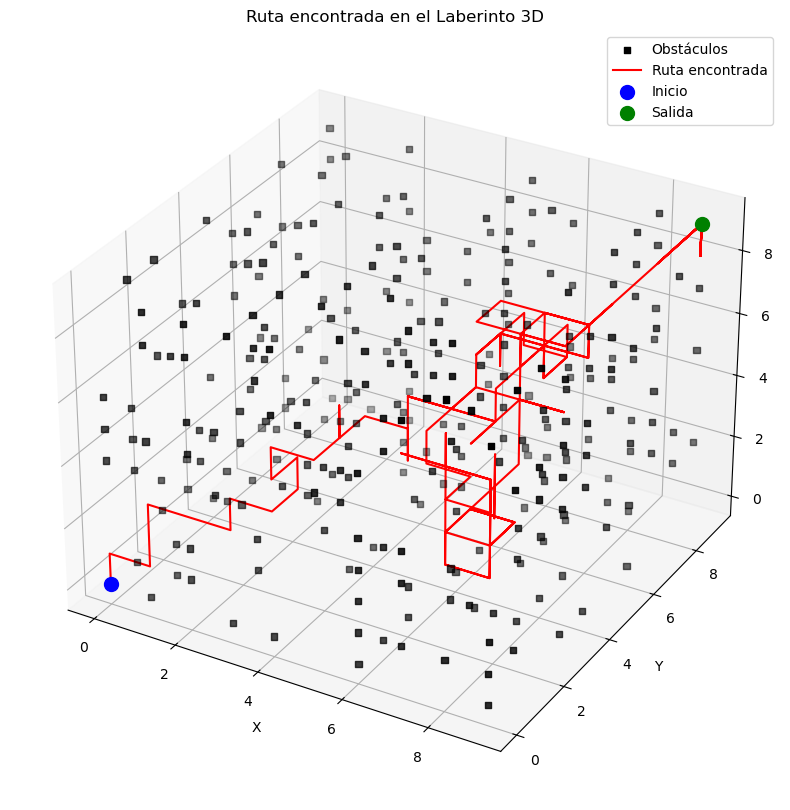

In [24]:
# Mostrar la ruta encontrada en 3D
def mostrar_ruta3D(individuo):
    pos = inicio3D
    camino = [pos]
    for mov in individuo:
        pos = mover3D(pos, MOVIMIENTOS_3D[mov])
        camino.append(pos)

    camino = np.array(camino)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Mostrar los obstáculos
    x_obs, y_obs, z_obs = np.where(laberinto3D == 1)
    ax.scatter(x_obs, y_obs, z_obs, c='black', marker='s', label="Obstáculos")

    # Mostrar el camino recorrido
    ax.plot(camino[:,0], camino[:,1], camino[:,2], 'r-', label="Ruta encontrada")
    
    # Marcar inicio y salida
    ax.scatter(*inicio3D, c='blue', marker='o', s=100, label="Inicio")
    ax.scatter(*salida3D, c='green', marker='o', s=100, label="Salida")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('Ruta encontrada en el Laberinto 3D')

    plt.show()

# Llamar la función
mostrar_ruta3D(mejor_individuo3D)




### **1. ¿Cómo afecta el tamaño de la población a la rapidez con la que se encuentra una solución?**

➔ En un problema 3D, el tamaño del espacio de búsqueda crece **exponencialmente** comparado con 2D.  
➔ Una **población más grande** (por ejemplo 300 individuos) permitió **explorar muchas más rutas posibles en paralelo**, lo cual **aumentó significativamente** la rapidez para encontrar una solución válida.  
➔ Si la población hubiera sido pequeña, habría muchas menos combinaciones de movimientos exploradas y el algoritmo habría tardado más o incluso no habría encontrado salida.

 **Conclusión:** En problemas 3D, una población grande **es fundamental** para encontrar una solución de manera eficiente.

---

### **2. ¿Cómo afecta la cantidad de generaciones?**

➔ Aumentar el número de generaciones (por ejemplo 2000) permitió **más oportunidades de evolución**, donde los caminos se fueron refinando generación tras generación.  
➔ Si hubiéramos limitado el número de generaciones (por ejemplo solo 100 o 300), el algoritmo probablemente **no habría podido encontrar la salida** completa debido a la complejidad espacial.  
➔ Cada generación mejora un poco las rutas, y en 3D se necesitan muchos ajustes para alcanzar la salida.

 **Más generaciones** permiten **acercarse progresivamente** a rutas óptimas en entornos más difíciles como 3D.

---

### **3. ¿Cómo afecta el cruce y las mutaciones?**

➔ El **cruce** permitió que diferentes rutas **compartieran caminos exitosos**: por ejemplo, si un individuo tenía éxito moviéndose bien en X y otro en Z, su combinación daba mejores resultados.  
➔ La **mutación** introdujo **variaciones aleatorias** que a veces permitieron saltar obstáculos inesperados o cambiar el eje de exploración (por ejemplo moverse hacia arriba o abajo para esquivar barreras).  
➔ En el entorno 3D, las mutaciones **fueron esenciales** porque hay muchos obstáculos en el espacio y caminos óptimos muy estrechos.

* Una buena combinación de cruce (CXPB=0.7) y mutación (MUTPB=0.3) fue **crítica** para encontrar la salida en 3D.

---

### **4. ¿Qué observa sobre la eficiencia del algoritmo genético?**

➔ El algoritmo genético demostró ser **altamente eficiente** para resolver un problema de navegación en 3D con obstáculos aleatorios.  
➔ Aunque el espacio de búsqueda era muy amplio y complejo, fue capaz de encontrar **un camino exacto** hacia la salida `(9,9,9)`.  
➔ El proceso de evolución mediante selección, cruce y mutación permitió **construir soluciones progresivamente mejores** sin necesidad de programar rutas explícitas.  
➔ Sin embargo, se necesita **más recursos computacionales** (más individuos, más generaciones) en 3D comparado con 2D.

 **Conclusión:** El algoritmo genético es **muy efectivo** en resolver laberintos 3D complejos, siempre que se ajuste adecuadamente el tamaño de la población, las generaciones y las tasas de mutación.

---

Usando algoritmos genéticos, se logró resolver exitosamente un laberinto tridimensional de tamaño 10x10x10 con obstáculos aleatorios. La eficiencia del modelo dependió directamente del tamaño de la población, el número de generaciones y el correcto balance entre cruce y mutaciones. El modelo evolucionó progresivamente hasta encontrar una ruta óptima que conectó el inicio y la salida a través de un espacio complejo.

---

